# Tutorial Session: Exploring Solar Spectra Using Hinode/EIS and Python

Welcome everyone!!! 
In this session, we are going to explore and learn how to analyse and use the spectroscopic daata of the solar corona obtained from Hinode/EIS and SDO/AIA


We will use python in our project. However, we do not have install any program since we can run it on a browser through Google Colab. Colab allow us to connect to computer on google server and do our python stuff through Notebook like this one for certain amount of time. 

Notebook is divided in to multiple cells which contains block of codes
- You can run each cell by pressing Shift+Enter on keyboard
- You can edit or mess around any code, it will not affect the actual source code unless you save it as a copy to github.
- To comment each line of code (i.e, prevent that line of code from running), type # in front of the line.

Note that Colab does not store any data once we disconnect, so we have to install these libraries every time we start a new session.

## Installing relevant modules

Some python libraries we are going to use today is not availiable on Colab. Therefore, we have to download them first using the command below.

In [ ]:
!pip install astropy>=5.1
!pip install -q sunpy[all]
!pip install -q eispac[all]
!pip install -U sunkit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.4/414.4 KB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.2/101.2 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.6/195.6 KB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 KB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 61.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyprojec

## Load libraries we need for fitting spectral lines and making EIS maps 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import sunpy
import sunpy.map
import sunkit_image.coalignment
from pathlib import Path
import os
import astropy.units as u
import eispac
# from eispac.net.attrs import FileType
from astropy.coordinates import SkyCoord
from sunpy.net import Fido,attrs as a
from sunpy.time import parse_time
from astropy.visualization import ImageNormalize

# list of templates for fitting some line profiles
templates_list = {
    'fe_10_184_536' : ['fe_10_184_536.1c.template.h5', 0],
    'fe_08_185_213' : ['fe_08_185_213.1c.template.h5', 0],
    'fe_11_188_216' : ['fe_11_188_216.2c.template.h5', 0],
    'fe_11_188_299' : ['fe_11_188_299.2c.template.h5', 1], 
    'fe_09_188_497' : ['fe_09_188_497.3c.template.h5', 0], 
    'ca_14_193_874' : ['ca_14_193_874.6c.template.h5', 1],
    'ar_14_194_396' : ['ar_14_194_396.6c.template.h5', 5],
    'fe_12_195_119' : ['fe_12_195_119.2c.template.h5', 0],  
    'fe_13_201_121' : ['fe_13_201_121.2c.template.h5', 1],
    'fe_13_202_044' : ['fe_13_202_044.1c.template.h5', 0],
    'fe_13_203_826' : ['fe_13_203_826.2c.template.h5', 1], 
    'si_10_258_375' : ['si_10_258_375.1c.template.h5', 0],
    'si_10_261_058' : ['si_10_261_058.1c.template.h5', 0],
    'fe_16_262_984' : ['fe_16_262_984.1c.template.h5', 0],
    's_10_264_233' : ['s__10_264_233.1c.template.h5', 0],
    'fe_14_264_787' : ['fe_14_264_787.1c.template.h5', 0],
    'fe_15_284_160' : ['fe_15_284_160.2c.template.h5', 1]}


## Select the dataset and the spectral line we want to fit

In [6]:
data_filename = 'eis_20110208_153218.data.h5'
line = 'fe_12_195_119'
#select template for the line we want to fit
template = eispac.read_template(eispac.data.get_fit_template_filepath(templates_list[line][0]))

## Reading and inspecting the data

In [7]:
cube = eispac.read_cube(data_filename, window=template.central_wave)

Data file,
   /Users/nawinngampoopun/Desktop/Script/Tutorial_SPCE2024/eis_20110208_153218.data.h5
Header file,
   /Users/nawinngampoopun/Desktop/Script/Tutorial_SPCE2024/eis_20110208_153218.head.h5
Found a wavelength 195.11 [Angstroms] in window 5
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


In [9]:
# see the dimensions of the data cube 
print(cube.dimensions) # (y-axis, x-axis, wavelength-axis)

[512.  60.  48.] pix


We can also plot the quicklook of EIS data - to get the idea on where we are looking at

Note that at this stage, we have not done any analysis yet, so this quicklook can't be used for scientific interpretation.

/var/folders/tp/ymc3q9hn3qjfxm1d5k7q2gp80000gp/T/ipykernel_44117/1730424018.py:2: RuntimeWarning: divide by zero encountered in log10
  scaled_img = np.log10(raster_sum)
/var/folders/tp/ymc3q9hn3qjfxm1d5k7q2gp80000gp/T/ipykernel_44117/1730424018.py:2: RuntimeWarning: invalid value encountered in log10
  scaled_img = np.log10(raster_sum)


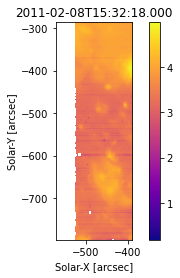

In [16]:
# sum the data along the wavelength axis to create an image
raster_sum = np.sum(cube.data, axis=2) 
# take the log10 of the sum to make the image more visible
scaled_img = np.log10(raster_sum)

plt.figure()
plt.imshow(scaled_img, origin='lower', extent=cube.meta['extent_arcsec'], cmap='plasma')
plt.title(cube.meta['date_obs'][-1])
plt.xlabel('Solar-X [arcsec]')
plt.ylabel('Solar-Y [arcsec]')
plt.colorbar()
plt.show()


## Spectral line fitting
We now fit the line chosen earlier in each pixel of the EIS dataset. 

# Pop quiz: 

In [ ]:
    
#check if the fit we want already exists
path = Path(data_filename.replace("data.h5",templates_list[line][0]).replace(".template",f"-{templates_list[line][1]}.fit"))
if path.is_file() == False:
    print('let\'s fit')
    #if the file is not there, fit the line
    cube = eispac.read_cube(data_filename, window=template.central_wave)
    fit_res = eispac.fit_spectra(cube, template, ncpu='max')
    eispac.save_fit(fit_res)
else:
    print('no need to fit')
    #if the file is there already, load it
    cube = eispac.read_cube(data_filename, window=template.central_wave)
    fit_res=eispac.read_fit(path)  

no need to fit
Data file,
   /content/drive/MyDrive/EISPACWorkshop/EIS data/eis_20110208_153218.data.h5
Header file,
   /content/drive/MyDrive/EISPACWorkshop/EIS data/eis_20110208_153218.head.h5
Found a wavelength 195.11 [Angstroms] in window 5


INFO:astropy:uncertainty should have attribute uncertainty_type.


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Reading fit result from, 
   /content/drive/MyDrive/EISPACWorkshop/EIS data/eis_20110208_153218.fe_12_195_119.2c-0.fit.h5


## Plot the fit we performed for this spectral line

Remember from the second session: we fit spectral lines using a Gaussian function:

$ f(x) = A e^{-\frac{(x-m)^2}{2\sigma^2}}$,

The fitted Gaussian function looks like this:

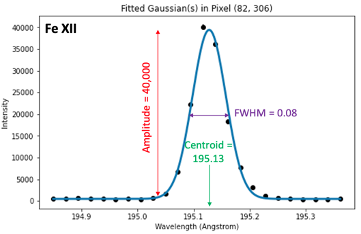

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/EISPACWorkshop/Gaussian.png',width=700)

### Pop Quiz: How can we use the fitted Gaussian to calculate the emission intensity and the doppler velocity of the plasma?

In [ ]:
# write the formula to calculate these values here.......

## Plot the intensity map
During the fitting process, we calculated the spectral line intensity for each pixel. Remember that the spectral line intensity is the area under the Gaussian curve.

INFO:astropy:uncertainty should have attribute uncertainty_type.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


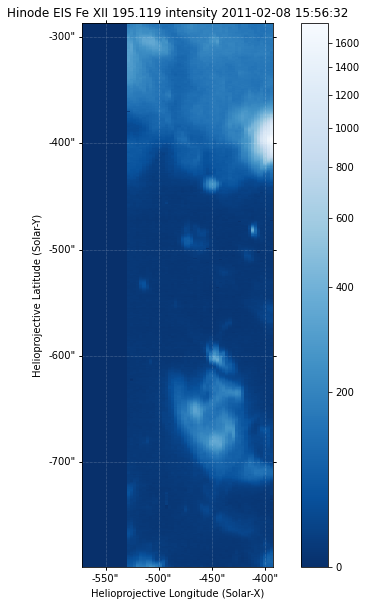

In [ ]:
eismap_intensity = fit_res.get_map(component=templates_list[line][1],measurement='intensity')

plt.figure(figsize=(10, 10))
eismap_intensity.plot()
plt.colorbar()

## Plot the velocity map
During the fitting process, we calculated the spectral line shift for each pixel. Remember that the spectral line shift is the difference between the center of the measured spectral line and the rest wavelength. This gives us information about the plasma velocity.

INFO:astropy:uncertainty should have attribute uncertainty_type.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


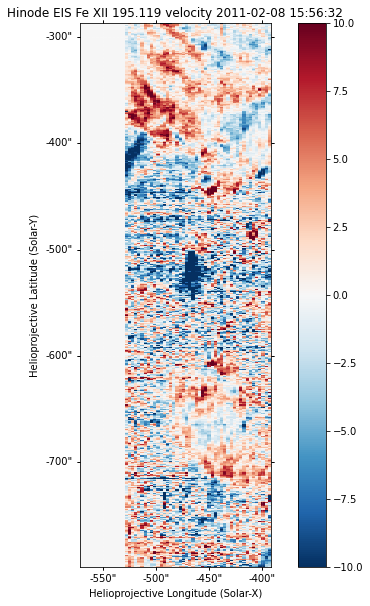

In [ ]:
eismap_velocity = fit_res.get_map(component=templates_list[line][1],measurement='velocity')

plt.figure(figsize=(10, 10))
eismap_velocity.plot()
plt.colorbar()

## Check the line profile from a chosen pixel
You can change the x and y values below to look at the profile of another pixel.

In [ ]:
y = -520
x = -465

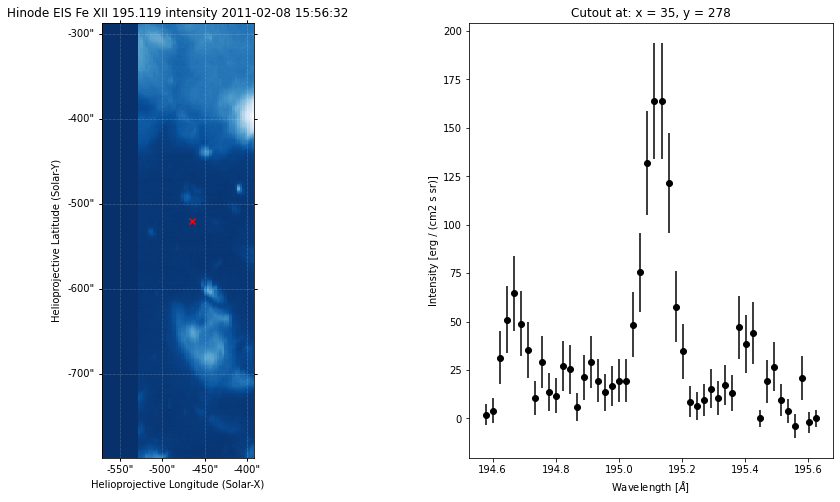

In [ ]:
arcsec_coordinate = SkyCoord(x*u.arcsec, y*u.arcsec, frame=eismap_intensity.coordinate_frame)
point_coordinates = eismap_intensity.world_to_pixel(arcsec_coordinate)

# Extract data profile and interpolate fit at higher spectral resolution
data_x = cube.wavelength[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
data_y = cube.data[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
data_err = cube.uncertainty.array[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
fit_x, fit_y = fit_res.get_fit_profile(coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c0_x, c0_y = fit_res.get_fit_profile(0, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c1_x, c1_y = fit_res.get_fit_profile(1, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c2_x, c2_y = fit_res.get_fit_profile(2, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)

# Make a multi-panel figure with the cutout and example profile
fig = plt.figure(figsize=[15,8])
plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.3)

data_subplt = fig.add_subplot(plot_grid[0,0], projection=eismap_intensity)
eismap_intensity.plot(data_subplt)
data_subplt.scatter(int(point_coordinates.x.value), int(point_coordinates.y.value), color='r', marker='x')


profile_subplt = fig.add_subplot(plot_grid[0,1])
profile_subplt.errorbar(data_x, data_y, yerr=data_err, ls='', marker='o', color='k')
profile_subplt.set_title(f'Cutout at: x = {int(point_coordinates.x.value)}, y = {int(point_coordinates.y.value)}')
profile_subplt.set_xlabel('Wavelength [$\AA$]')
profile_subplt.set_ylabel('Intensity ['+cube.unit.to_string()+']')
plt.show()

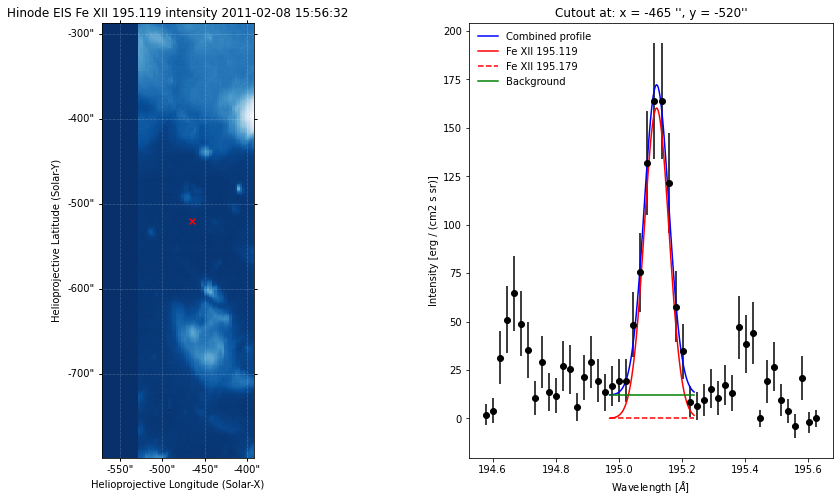

In [ ]:
# Extract data profile and interpolate fit at higher spectral resolution
data_x = cube.wavelength[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
data_y = cube.data[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
data_err = cube.uncertainty.array[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
fit_x, fit_y = fit_res.get_fit_profile(coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c0_x, c0_y = fit_res.get_fit_profile(0, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c1_x, c1_y = fit_res.get_fit_profile(1, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c2_x, c2_y = fit_res.get_fit_profile(2, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)


# Make a multi-panel figure with the cutout and example profile
fig = plt.figure(figsize=[15,8])
plot_grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.3)

data_subplt = fig.add_subplot(plot_grid[0,0], projection=eismap_intensity)
eismap_intensity.plot(data_subplt)
data_subplt.scatter(int(point_coordinates.x.value), int(point_coordinates.y.value), color='r', marker='x')


profile_subplt = fig.add_subplot(plot_grid[0,1])
profile_subplt.errorbar(data_x, data_y, yerr=data_err, ls='', marker='o', color='k')
profile_subplt.plot(fit_x, fit_y, color='b', label='Combined profile')
profile_subplt.plot(c0_x, c0_y, color='r', label=fit_res.fit['line_ids'][0])
profile_subplt.plot(c1_x, c1_y, color='r', ls='--', label=fit_res.fit['line_ids'][1])
profile_subplt.plot(c2_x, c2_y, color='g', label='Background')
profile_subplt.set_title(f'Cutout at: x = {x} \'\', y = {y}\'\'')
profile_subplt.set_xlabel('Wavelength [$\AA$]')
profile_subplt.set_ylabel('Intensity ['+cube.unit.to_string()+']')
profile_subplt.legend(loc='upper left', frameon=False)
plt.show()

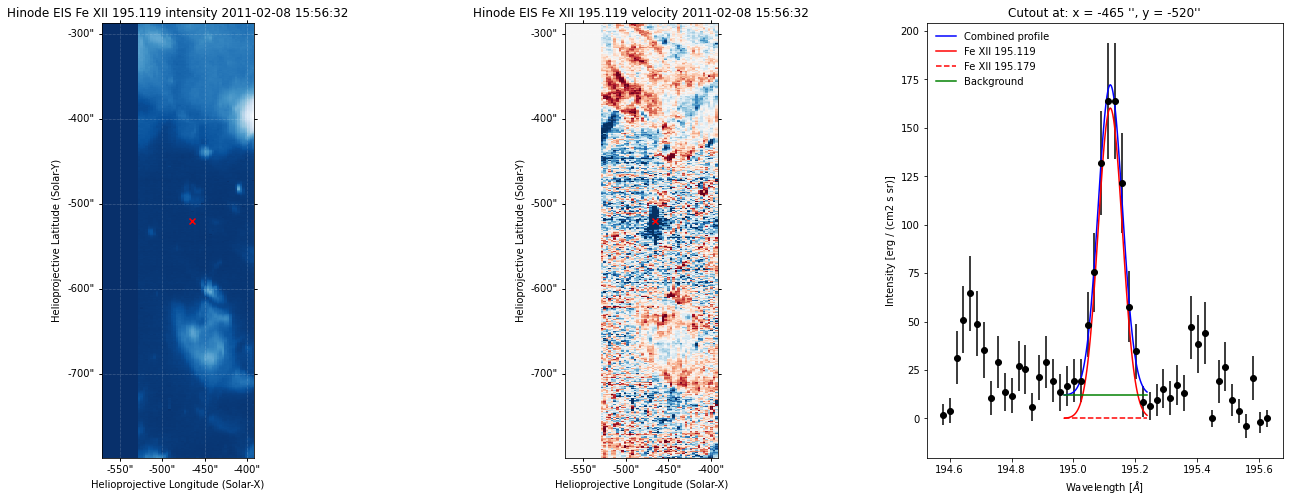

In [ ]:
# Extract data profile and interpolate fit at higher spectral resolution
data_x = cube.wavelength[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
data_y = cube.data[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
data_err = cube.uncertainty.array[int(point_coordinates.y.value), int(point_coordinates.x.value), :]
fit_x, fit_y = fit_res.get_fit_profile(coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c0_x, c0_y = fit_res.get_fit_profile(0, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c1_x, c1_y = fit_res.get_fit_profile(1, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)
c2_x, c2_y = fit_res.get_fit_profile(2, coords=[int(point_coordinates.y.value),int(point_coordinates.x.value)], num_wavelengths=100)


# Make a multi-panel figure with the cutout and example profile
fig = plt.figure(figsize=[23,8])
plot_grid = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3)

data_subplt1 = fig.add_subplot(plot_grid[0,0], projection=eismap_intensity)
eismap_intensity.plot(data_subplt1)
data_subplt1.scatter(int(point_coordinates.x.value), int(point_coordinates.y.value), color='r', marker='x')

data_subplt2 = fig.add_subplot(plot_grid[0,1], projection=eismap_velocity)
eismap_velocity.plot(data_subplt2)
data_subplt2.scatter(int(point_coordinates.x.value), int(point_coordinates.y.value), color='r', marker='x')


profile_subplt = fig.add_subplot(plot_grid[0,2])
profile_subplt.errorbar(data_x, data_y, yerr=data_err, ls='', marker='o', color='k')
profile_subplt.plot(fit_x, fit_y, color='b', label='Combined profile')
profile_subplt.plot(c0_x, c0_y, color='r', label=fit_res.fit['line_ids'][0])
profile_subplt.plot(c1_x, c1_y, color='r', ls='--', label=fit_res.fit['line_ids'][1])
profile_subplt.plot(c2_x, c2_y, color='g', label='Background')
profile_subplt.set_title(f'Cutout at: x = {x} \'\', y = {y}\'\'')
profile_subplt.set_xlabel('Wavelength [$\AA$]')
profile_subplt.set_ylabel('Intensity ['+cube.unit.to_string()+']')
profile_subplt.legend(loc='upper left', frameon=False)
plt.show()

Exercise: Find the pixel with the highest Fe XII 195.119 A intensity. Remember the intensity is proportional to the amplitude (i.e. the height) of the Gaussian curve.

## Draw contours on EIS map
First, define the contour thresholds by intensity.

In [ ]:
intensity_level = [200]

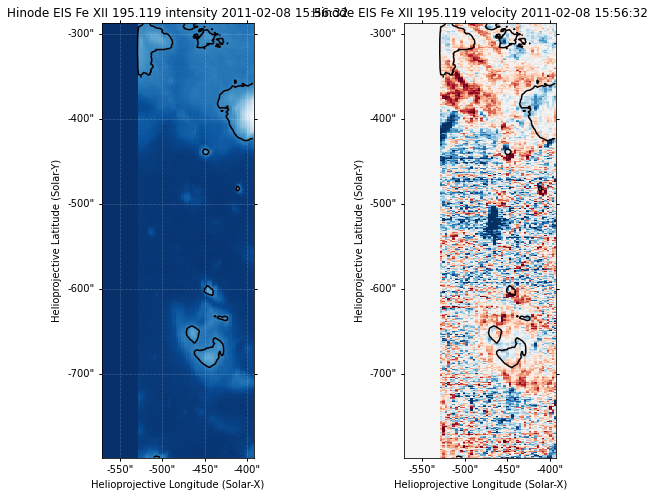

In [ ]:
# Make a multi-panel figure with the cutout and example profile
fig = plt.figure(figsize=[15,8])
plot_grid = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3)

data_subplt1 = fig.add_subplot(plot_grid[0,0], projection=eismap_intensity)
eismap_intensity.plot(data_subplt1)
eismap_intensity.draw_contours(intensity_level*eismap_intensity.unit, axes=data_subplt1, cmap='hot', alpha=1.0)

data_subplt2 = fig.add_subplot(plot_grid[0,1], projection=eismap_velocity)
eismap_velocity.plot(data_subplt2)
eismap_intensity.draw_contours(intensity_level*eismap_intensity.unit, axes=data_subplt2, cmap='hot', alpha=1.0)

Exercise: find the region with the highest intensity.

Now, define the contour threshold by velocity.

In [ ]:
velocity_level = [-14]

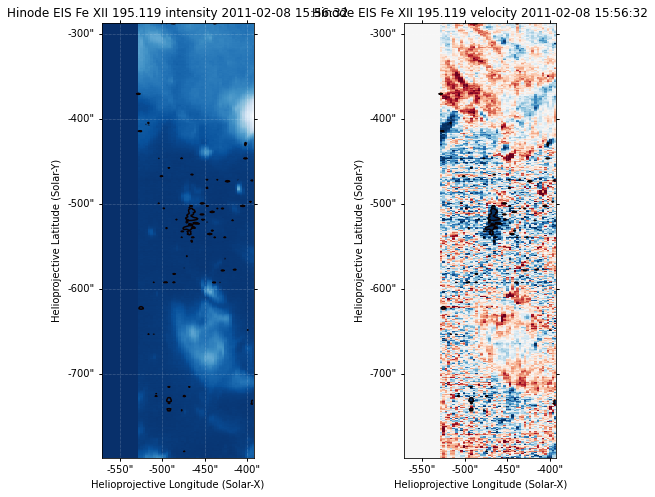

In [ ]:
# Make a multi-panel figure with the cutout and example profile
fig = plt.figure(figsize=[15,8])
plot_grid = fig.add_gridspec(nrows=1, ncols=3, wspace=0.3)

data_subplt1 = fig.add_subplot(plot_grid[0,0], projection=eismap_intensity)
eismap_intensity.plot(data_subplt1)
eismap_velocity.draw_contours(velocity_level*eismap_velocity.unit, axes=data_subplt1, cmap='hot', alpha=1.0)

data_subplt2 = fig.add_subplot(plot_grid[0,1], projection=eismap_velocity)
eismap_velocity.plot(data_subplt2)
eismap_velocity.draw_contours(velocity_level*eismap_velocity.unit, axes=data_subplt2, cmap='hot', alpha=1.0)

Exercise: find the area with the highest plasm velocity.

Bonus: if you found this easy, try now to use the code above and plot the profiles in the regions with high intensity or high velocity.

## Make AIA maps matching the time and field of view of EIS

---


We first download the data from the Virtual Solar Observatory (VSO), and the crop the AIA and HMI maps to match the field of view of the EIS map.

In [ ]:
time_range = a.Time(parse_time(eismap_intensity.meta['date_beg']),parse_time(eismap_intensity.meta['date_beg'])+30*u.minute)

#Download an AIA 193 map
aia_193 = time_range & a.Instrument.aia & a.Wavelength(193*u.angstrom)
aia_193_search = Fido.search(aia_193)
aia_193_result = Fido.fetch(aia_193_search[0][0], path=eis_datadir)
aia_193_map = sunpy.map.Map(aia_193_result[0])

#Align the EIS map to AIA
# 1) Resample (degrade) AIA map
n_x = (aia_193_map.scale.axis1 * aia_193_map.dimensions.x) / eismap_intensity.scale.axis1
n_y = (aia_193_map.scale.axis2 * aia_193_map.dimensions.y) / eismap_intensity.scale.axis2
aia_193_map_resampled = aia_193_map.resample(u.Quantity([n_x, n_y]))
    
# 2) Calculate shift
yshift, xshift = sunkit_image.coalignment.calculate_shift(aia_193_map_resampled.data, eismap_intensity.data)
reference_coord = aia_193_map_resampled.pixel_to_world(xshift, yshift)
Txshift = reference_coord.Tx - eismap_intensity.bottom_left_coord.Tx
Tyshift = reference_coord.Ty - eismap_intensity.bottom_left_coord.Ty
print('Shifting by: '+str(Txshift)+ ' in x, and '+str(Tyshift)+' in y')

# 3) Shift map by calculated amount  
eismap_intensity = eismap_intensity.shift_reference_coord(Txshift, Tyshift)
eismap_intensity.meta['xcen'] = eismap_intensity.meta['xcen'] + float(Txshift.arcsec)
eismap_intensity.meta['ycen'] = eismap_intensity.meta['ycen'] + float(Tyshift.arcsec)
eismap_intensity.meta['history'] = eismap_intensity.meta['history'] + ', shifted by '+str(Txshift)+ ' in x, and '+str(Tyshift)+' in y to align to AIA 193'

#Crop the AIA map to the field of view of EIS
top_right = SkyCoord(eismap_intensity.top_right_coord.Tx, eismap_intensity.top_right_coord.Ty, frame=aia_193_map.coordinate_frame)
bottom_left = SkyCoord(eismap_intensity.bottom_left_coord.Tx, eismap_intensity.bottom_left_coord.Ty, frame=aia_193_map.coordinate_frame)
aia_193_map = aia_193_map.submap(bottom_left, top_right=top_right)   



#Download a photospheric magnetic field map
hmi_mag = time_range & a.Instrument.hmi & a.Physobs.los_magnetic_field
hmi_mag_search = Fido.search(hmi_mag)
hmi_mag_result = Fido.fetch(hmi_mag_search[0][0], path=eis_datadir)
hmi_mag_map = sunpy.map.Map(hmi_mag_result[0])
hmi_mag_map = hmi_mag_map.rotate(order=3)

#Crop the HMI map to the field of view of EIS
top_right = SkyCoord(eismap_intensity.top_right_coord.Tx, eismap_intensity.top_right_coord.Ty, frame=hmi_mag_map.coordinate_frame)
bottom_left = SkyCoord(eismap_intensity.bottom_left_coord.Tx, eismap_intensity.bottom_left_coord.Ty, frame=hmi_mag_map.coordinate_frame)
hmi_mag_map = hmi_mag_map.submap(bottom_left, top_right=top_right)        

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

1/0 files failed to download. Please check `.errors` for details


IndexError: ignored

The VSO ocasionally runs into issues - if downloading the data above does not work, load the files in the EIS data folder.

In [ ]:
#Load the AIA 193 map
aia_193_map = sunpy.map.Map(eis_datadir+'aia_lev1_193a_2011_02_08t15_32_19_84z_image_lev1.fits')

#Align the EIS map to AIA
# 1) Resample (degrade) AIA map
n_x = (aia_193_map.scale.axis1 * aia_193_map.dimensions.x) / eismap_intensity.scale.axis1
n_y = (aia_193_map.scale.axis2 * aia_193_map.dimensions.y) / eismap_intensity.scale.axis2
aia_193_map_resampled = aia_193_map.resample(u.Quantity([n_x, n_y]))
    
# 2) Calculate shift
yshift, xshift = sunkit_image.coalignment.calculate_shift(aia_193_map_resampled.data, eismap_intensity.data)
reference_coord = aia_193_map_resampled.pixel_to_world(xshift, yshift)
Txshift = reference_coord.Tx - eismap_intensity.bottom_left_coord.Tx
Tyshift = reference_coord.Ty - eismap_intensity.bottom_left_coord.Ty
print('Shifting by: '+str(Txshift)+ ' in x, and '+str(Tyshift)+' in y')

# 3) Shift map by calculated amount  
eismap_intensity = eismap_intensity.shift_reference_coord(Txshift, Tyshift)
eismap_intensity.meta['xcen'] = eismap_intensity.meta['xcen'] + float(Txshift.arcsec)
eismap_intensity.meta['ycen'] = eismap_intensity.meta['ycen'] + float(Tyshift.arcsec)
eismap_intensity.meta['history'] = eismap_intensity.meta['history'] + ', shifted by '+str(Txshift)+ ' in x, and '+str(Tyshift)+' in y to align to AIA 193'

#Crop the AIA map to the field of view of EIS
top_right = SkyCoord(eismap_intensity.top_right_coord.Tx, eismap_intensity.top_right_coord.Ty, frame=aia_193_map.coordinate_frame)
bottom_left = SkyCoord(eismap_intensity.bottom_left_coord.Tx, eismap_intensity.bottom_left_coord.Ty, frame=aia_193_map.coordinate_frame)
aia_193_map = aia_193_map.submap(bottom_left, top_right=top_right)   


#Load the photospheric magnetic field map
hmi_mag_map = sunpy.map.Map(eis_datadir+'hmi_m_45s_2011_02_08_15_33_45_tai_magnetogram.fits')
hmi_mag_map = hmi_mag_map.rotate(order=3)

#Crop the HMI map to the field of view of EIS
top_right = SkyCoord(eismap_intensity.top_right_coord.Tx, eismap_intensity.top_right_coord.Ty, frame=hmi_mag_map.coordinate_frame)
bottom_left = SkyCoord(eismap_intensity.bottom_left_coord.Tx, eismap_intensity.bottom_left_coord.Ty, frame=hmi_mag_map.coordinate_frame)
hmi_mag_map = hmi_mag_map.submap(bottom_left, top_right=top_right) 
hmi_mag_map.plot_settings['norm'] = ImageNormalize(vmin=-300, vmax=300)

INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.
INFO:sunpy:Missing metadata for solar radius: assuming the standard radius of the photosphere.


Shifting by: 11.9818arcsec in x, and -15.0507arcsec in y
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


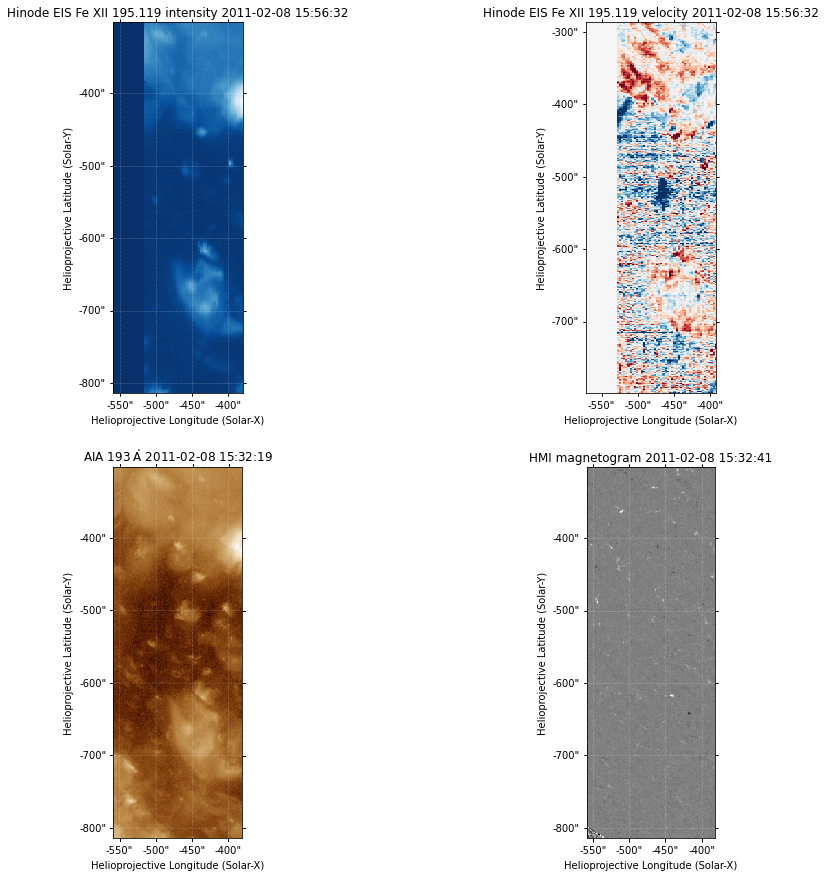

In [ ]:
# Make a multi-panel figure with the cutout and example profile
fig = plt.figure(figsize=[15,15])
plot_grid = fig.add_gridspec(nrows=2, ncols=2, wspace=0.3)

data_subplt1 = fig.add_subplot(plot_grid[0,0], projection=eismap_intensity)
eismap_intensity.plot(data_subplt1)

data_subplt2 = fig.add_subplot(plot_grid[0,1], projection=eismap_velocity)
eismap_velocity.plot(data_subplt2)

data_subplt3 = fig.add_subplot(plot_grid[1,0], projection=aia_193_map)
aia_193_map.plot(data_subplt3)

data_subplt4 = fig.add_subplot(plot_grid[1,1], projection=hmi_mag_map)
hmi_mag_map.plot(data_subplt4)

Exercise: make notes of what you see in these plots - how do you interpret what you see?